In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy
%matplotlib inline

In [16]:
new_am=am=pd.read_csv('Adult Mortality.csv', encoding='EUC-KR')
new_gdp=gdp=pd.read_csv('GDP.csv', encoding='EUC-KR')
new_le=le=pd.read_csv('Life Expectancy.csv', encoding='EUC-KR')
new_popud=popud=pd.read_csv('Population density.csv', encoding='EUC-KR')
new_pop=pop=pd.read_csv('Population.csv', encoding='EUC-KR')

In [17]:
am.fillna(0, inplace=True)
new_am.fillna(0, inplace=True)
pass

In [18]:
gdp.fillna(0, inplace=True)
new_gdp.fillna(0, inplace=True)
pass

In [19]:
le.fillna(0, inplace=True)
new_le.fillna(0, inplace=True)
pass

In [20]:
popud.fillna(0, inplace=True)
new_popud.fillna(0, inplace=True)
pass

In [21]:
pop.fillna(0, inplace=True)
new_pop.fillna(0, inplace=True)
pass

In [22]:
def impute(row):
    start=0
    end=years
    aver_dev=0
    
    for i in range(years):
        if row[i+1]!=0: 
            start=i+1
            break
    for i in range(years):
        if row[years-i]!=0: 
            end=years-i
            break
            
    aver_dev=(row[end]-row[start])/(end-start)
    for i in range(start):
        row[start-i]=row[start-i+1]-aver_dev
    for i in range(years-end-1):
        row[end+i+1]=row[end+i]+aver_dev
    for i in range(2, years+1):
        if (row[i]==0): row[i]=row[i-1]+aver_dev
    
    return row

In [23]:
years=len(list(le.columns))-1

In [24]:
cols=['Adult Mortality', 'GDP', 'Population density', 'Population', 'Life Expectancy']

In [25]:
Countries=le['Country Name'].unique()
rows=np.tile(Countries, years)

In [26]:
data=np.zeros((len(rows), len(cols)))

In [31]:
for i in range(0, len(Countries)):
    try:
        row=impute(am.iloc[i][:years+1])
        print(row)
        for j in range(years+1):
            am.iat[i, j]=row[j]
    except TypeError:
        continue
        
for i in range(0, len(Countries)):
    try:
        row=impute(gdp.iloc[i][:years+1])
        print(row)
        for j in range(years+1):
            gdp.iat[i, j]=row[j]
    except TypeError:
        continue
        
for i in range(0, len(Countries)):
    try:
        row=impute(popud.iloc[i][:years+1])
        print(row)
        for j in range(years+1):
            popud.iat[i, j]=row[j]
    except TypeError:
        continue

for i in range(0, len(Countries)):
    try:
        row=impute(pop.iloc[i][:years+1])
        print(row)
        for j in range(years+1):
            pop.iat[i, j]=row[j]
    except TypeError:
        continue

for i in range(0, len(Countries)):
    try:
        row=impute(le.iloc[i][:years+1])
        print(row)
        for j in range(years+1):
            le.iat[i, j]=row[j]
    except TypeError:
        continue

Country Name      Aruba
1960            225.191
1961             223.17
1962            219.087
1963             215.33
1964            211.574
1965            207.817
1966            204.061
1967            200.304
1968            197.676
1969            195.048
1970             192.42
1971            189.792
1972            187.164
1973            183.914
1974            180.663
1975            177.413
1976            174.163
1977            170.913
1978            166.633
1979            162.353
1980            158.073
1981            153.793
1982            149.513
1983            148.759
1984            148.004
1985             147.25
1986            146.495
1987            145.741
1988            144.988
1989            144.235
1990            143.482
1991            142.729
1992            141.976
1993            141.725
1994            141.475
1995            141.225
1996            140.974
1997            140.724
1998            139.937
1999             139.15
2000            

c:\python\python37\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


Country Name     Sweden
1960            138.507
1961            137.131
1962            138.904
1963            137.803
1964            141.865
1965            139.014
1966            138.838
1967            142.739
1968            143.114
1969            142.949
1970            140.477
1971            144.358
1972             146.17
1973            144.449
1974            145.635
1975            146.601
1976            147.515
1977            147.074
1978            146.058
1979            146.361
1980            142.069
1981            137.666
1982            133.925
1983             129.95
1984            128.071
1985            126.674
1986            125.549
1987            125.485
1988             122.28
1989            117.448
1990            114.392
1991            115.134
1992            107.173
1993            106.084
1994            102.547
1995             99.434
1996             94.483
1997             93.164
1998             90.303
1999              89.98
2000            

In [32]:
df=pd.DataFrame(data, index=rows, columns=cols)

In [33]:
for i in range(years):
    df['Adult Mortality'][i*len(Countries):(i+1)*len(Countries)]=am[le.columns[i+1]]
    df['GDP'][i*len(Countries):(i+1)*len(Countries)]=gdp[le.columns[i+1]]
    df['Population density'][i*len(Countries):(i+1)*len(Countries)]=popud[le.columns[i+1]]
    df['Population'][i*len(Countries):(i+1)*len(Countries)]=pop[le.columns[i+1]]
    df['Life Expectancy'][i*len(Countries):(i+1)*len(Countries)]=le[le.columns[i+1]]

In [34]:
df

,Adult Mortality,GDP,Population density,Population,Life Expectancy
Aruba,225.191456,-1.511212e+09,302.535185,5.454776e+04,65.892456
Afghanistan,605.298930,2.182627e+08,12.818798,8.683627e+06,32.184895
Angola,563.286737,-4.980304e+10,3.787264,5.094320e+06,33.071982
Albania,152.400895,-7.846232e+09,60.911788,1.638118e+06,63.013509
Andorra,0.000000,-6.352295e+08,28.026428,1.327853e+04,0.000000
Arab World,358.840744,-4.685987e+11,7.647663,8.907636e+07,46.953278
United Arab Emirates,323.315351,-1.294593e+11,-3.129734,-6.366160e+04,52.870825
Argentina,254.526474,-8.396336e+09,7.425858,2.040325e+07,64.935456
Armenia,220.589614,-9.170894e+09,69.338863,1.922912e+06,66.247421
American Samoa,0.000000,1.830862e+08,100.148684,1.999266e+04,0.000000


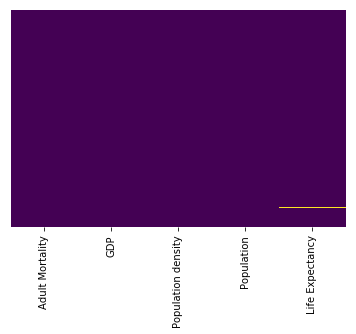

In [37]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')